**Sam Alim Ramadhan**

**1103210236**

**Lecture 9**

**Neural Network**

# **Instalasi Library**

In [ ]:
# !pip install tensorflow keras

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Load Dataset**

In [ ]:
# Membaca Dataset
url = "/content/drive/MyDrive/Machine Learning/ML-09/Dataset/housepricedata.csv"
data = pd.read_csv(url)

## Data Information

In [ ]:
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


# **Preproccessing**

## Datasplit

In [ ]:
# Menentukan fitur dan target
features = ['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea']
target = 'AboveMedianPrice'

# Memasukkan fitu dan target ke dalam suatu variabel
X = data[features]
y = data[target]

# Inisialisasi MinMaxScaler dan fitting ke X untuk normalisasi
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
# Proses datasplit untuk memisahkan train dan test pada dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# **Modeling**

In [ ]:
# Pembuatan model dengan beberapa layer dan menggunakan parameter di masing-masing layernya
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model: optimizer SGD, loss binary crossentropy, metric accuracy
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Melatih model dengan batch size 32, 100 epoch, validasi dengan X_val dan y_val
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
16/16 [==============================] - 1s 22ms/step - loss: 0.6684 - accuracy: 0.5108 - val_loss: 0.6646 - val_accuracy: 0.5186
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6642 - accuracy: 0.5166 - val_loss: 0.6606 - val_accuracy: 0.5303
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6603 - accuracy: 0.5656 - val_loss: 0.6571 - val_accuracy: 0.5577
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6567 - accuracy: 0.5890 - val_loss: 0.6536 - val_accuracy: 0.6125
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6532 - accuracy: 0.6223 - val_loss: 0.6504 - val_accuracy: 0.6458
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6498 - accuracy: 0.6497 - val_loss: 0.6472 - val_accuracy: 0.6712
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.6595 - val_loss: 0.6440 - val_accuracy: 0.6967
Epoch 8/100


# **Plotting**

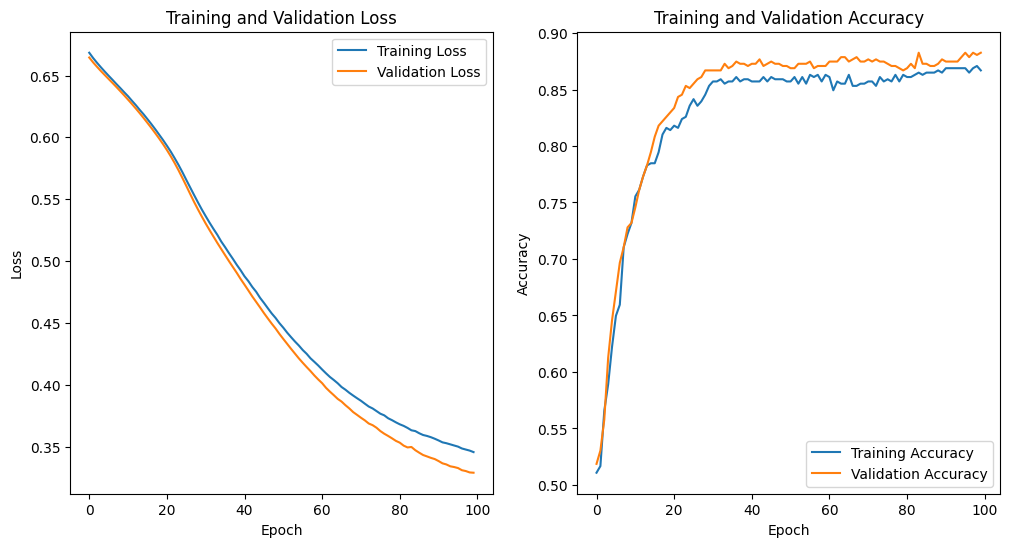

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Dapat dilihat bahwa model memiliki loss yang berkurang setiap iterasi. Model juga memiliki akurasi yang meningkat tiap iterasi namun berhenti stabil di sekitar 80% untuk akurasi data validasi pada iterasi ke-50 dan seterusnya